In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer-dataset/train_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/lung-cancer-dataset/train_data.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [5]:
coli = df.columns
print(coli)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [6]:
col = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
target = ['LUNG_CANCER']

In [7]:
import warnings

# Filter out all warnings
warnings.filterwarnings("ignore")

In [8]:
df.nunique().sort_values()

GENDER                    2
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
AGE                      39
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Create a correlation matrix including both features and target
# corr_matrix = df[col + target].corr()

# # Plotting the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()

Text(0.5, 0, 'LUNG CANCER')

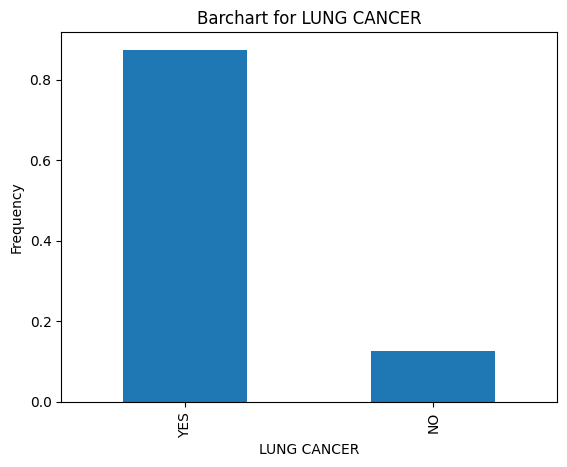

In [10]:
df["LUNG_CANCER"].value_counts(normalize=True).plot(kind="bar")
plt.title("Barchart for LUNG CANCER")
plt.ylabel("Frequency")
plt.xlabel("LUNG CANCER")

Text(0.5, 0, 'Gender')

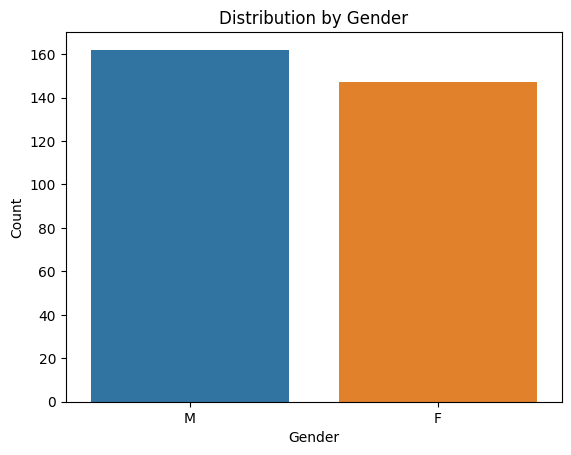

In [11]:
sns.countplot(df, x="GENDER")
plt.title("Distribution by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")

<Axes: xlabel='GENDER', ylabel='count'>

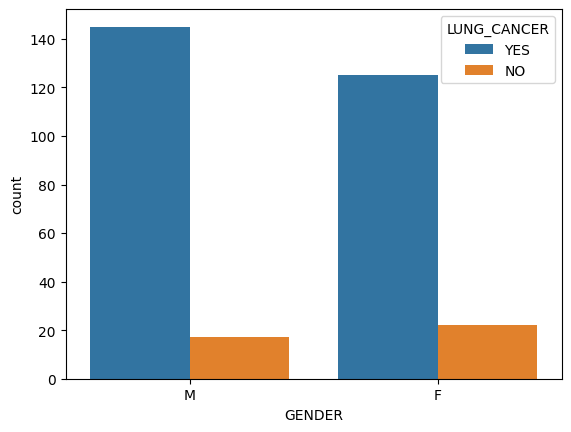

In [12]:
sns.countplot(df, x="GENDER", hue = "LUNG_CANCER")

<Axes: >

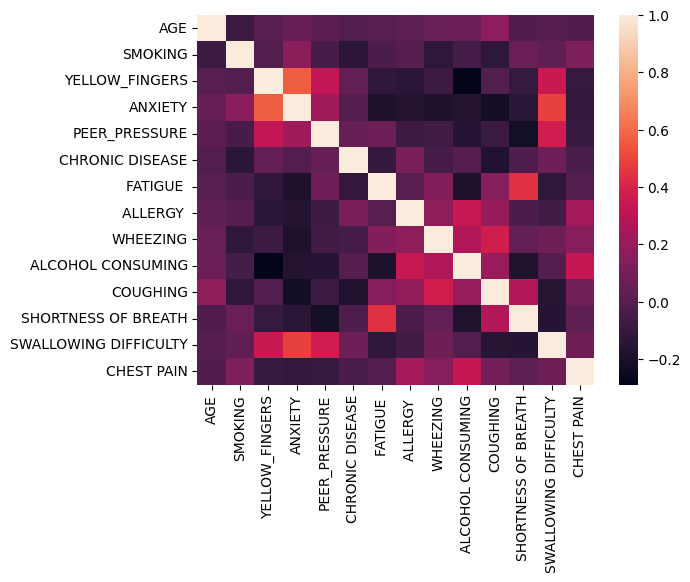

In [13]:
sns.heatmap(df.select_dtypes("number").corr())

In [14]:
X = df.drop(columns= target)
y= df[target]

In [15]:
# For Model 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
log = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LogisticRegression(random_state=42)
)
log.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['GENDER'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [18]:
test =accuracy_score(y_test, log.predict(X_test))
train = accuracy_score(y_train, log.predict(X_train))
print(train, test)

0.9311740890688259 0.967741935483871


In [19]:
lgb = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    LGBMClassifier(random_state=42)
)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 210, number of negative: 37
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.850202 -> initscore=1.736190
[LightGBM] [Info] Start training from score 1.736190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['GENDER'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('lgbmclassifier', LGBMClassifier(random_state=42))])

In [20]:
test =accuracy_score(y_test, lgb.predict(X_test))
train = accuracy_score(y_train, lgb.predict(X_train))
print(train, test)

0.9919028340080972 0.9838709677419355


In [21]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    RandomForestClassifier(random_state=42)
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['GENDER'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [22]:
test =accuracy_score(y_test, model.predict(X_test))
train = accuracy_score(y_train, model.predict(X_train))
print(train, test)

0.9959514170040485 0.967741935483871


In [23]:
catBoost = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    StandardScaler(),
    CatBoostClassifier(random_state=42)
)
catBoost.fit(X_train, y_train)

Learning rate set to 0.00567
0:	learn: 0.6874206	total: 54.9ms	remaining: 54.9s
1:	learn: 0.6823716	total: 56.7ms	remaining: 28.3s
2:	learn: 0.6765522	total: 58.3ms	remaining: 19.4s
3:	learn: 0.6710253	total: 59.6ms	remaining: 14.8s
4:	learn: 0.6661984	total: 60.8ms	remaining: 12.1s
5:	learn: 0.6606280	total: 62.1ms	remaining: 10.3s
6:	learn: 0.6548652	total: 63.3ms	remaining: 8.98s
7:	learn: 0.6491344	total: 64.5ms	remaining: 8s
8:	learn: 0.6427085	total: 66.3ms	remaining: 7.3s
9:	learn: 0.6380533	total: 67.6ms	remaining: 6.69s
10:	learn: 0.6317937	total: 69ms	remaining: 6.2s
11:	learn: 0.6265913	total: 70.5ms	remaining: 5.8s
12:	learn: 0.6213970	total: 71.8ms	remaining: 5.45s
13:	learn: 0.6171581	total: 72.7ms	remaining: 5.12s
14:	learn: 0.6121406	total: 74ms	remaining: 4.86s
15:	learn: 0.6071767	total: 75.4ms	remaining: 4.63s
16:	learn: 0.6022980	total: 76.6ms	remaining: 4.43s
17:	learn: 0.5971590	total: 77.9ms	remaining: 4.25s
18:	learn: 0.5926896	total: 79.6ms	remaining: 4.11s
19:

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['GENDER'], use_cat_names=True)),
                ('standardscaler', StandardScaler()),
                ('catboostclassifier',
                 <catboost.core.CatBoostClassifier object at 0x78b356c2d3f0>)])

In [24]:
test =accuracy_score(y_test, catBoost.predict(X_test))
train = accuracy_score(y_train, catBoost.predict(X_train))
print(train, test)

0.9919028340080972 0.967741935483871


In [25]:
sub = lgb.predict(X_test)
df_sub = pd.DataFrame({"LUNG_CANCER": sub}, index=X_test['AGE'])
df_sub.to_csv("Lgb.csv")

In [26]:
df_sub.head()

,LUNG_CANCER
AGE,
61,YES
53,YES
73,YES
70,YES
65,YES
